<a href="https://colab.research.google.com/github/Chirudeepvelishetti/dsmajorproject/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
path='/content/drive/MyDrive/owid-covid-data.csv'
df=pd.read_csv(path)
df

In [ ]:
df=df.iloc[41821:42345,:]
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41821,IND,Asia,India,2020-02-01,1,0,00,00,00,00,0.001,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41822,IND,Asia,India,2020-02-02,2,1,00,00,00,00,0.001,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41823,IND,Asia,India,2020-02-03,3,1,00,00,00,00,0.002,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41824,IND,Asia,India,2020-02-04,3,0,0.429,00,00,0,0.002,0,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41825,IND,Asia,India,2020-02-05,3,0,0.429,00,00,0,0.002,0,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42340,IND,Asia,India,2021-07-04,3.05852e+07,39796,43699.7,402728,723,856.857,22163.1,28.838,31.666,291.831,0.524,0.621,0.81,00,00,00,00,00,00,00,00,1.83849e+06,4.18255e+08,303.082,1.332,1.99855e+06,1.448,0.022,45.7,samples tested,3.47379e+08,2.84455e+08,6.29233e+07,3.07796e+06,4.19259e+06,25.17,20.61,4.56,3038,81.94,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42341,IND,Asia,India,2021-07-05,3.06199e+07,34703,43290.7,403281,553,806.286,22188.3,25.147,31.37,292.232,0.401,0.584,0.81,00,00,00,00,00,00,00,00,1.5225e+06,4.19777e+08,304.186,1.103,1.91517e+06,1.388,0.023,44.2,samples tested,3.51229e+08,2.86752e+08,6.44777e+07,3.85095e+06,4.25799e+06,25.45,20.78,4.67,3085,81.94,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42342,IND,Asia,India,2021-07-06,3.06637e+07,43733,42973.9,404211,930,822.429,22220,31.69,31.14,292.906,0.674,0.596,0.82,00,00,00,00,00,00,00,00,1.64742e+06,4.21425e+08,305.379,1.194,1.89794e+06,1.375,0.023,44.2,samples tested,3.54308e+08,2.88783e+08,6.55251e+07,3.07815e+06,3.84053e+06,25.67,20.93,4.75,2783,00,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42343,IND,Asia,India,2021-07-07,3.07096e+07,45892,42560.4,405028,817,795.571,22253.2,33

In [ ]:
df=df.fillna("00 ")
df.isnull().sum()

In [ ]:
df.to_csv('df.csv',index=False)
df.head(191)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41821,IND,Asia,India,2020-02-01,1,0,00,00,00,00,0.001,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41822,IND,Asia,India,2020-02-02,2,1,00,00,00,00,0.001,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41823,IND,Asia,India,2020-02-03,3,1,00,00,00,00,0.002,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41824,IND,Asia,India,2020-02-04,3,0,0.429,00,00,0,0.002,0,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
41825,IND,Asia,India,2020-02-05,3,0,0.429,00,00,0,0.002,0,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42007,IND,Asia,India,2020-08-05,1.96454e+06,56282,54653.3,40699,904,820.571,1423.57,40.784,39.604,29.492,0.655,0.595,1.14,00,00,00,00,00,00,00,00,619652,2.14844e+07,15.568,0.449,534380,0.387,0.102,9.8,samples tested,00,00,00,00,00,00,00,00,00,85.65,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42008,IND,Asia,India,2020-08-06,2.02707e+06,62538,56046.9,41585,886,838.143,1468.89,45.317,40.614,30.134,0.642,0.607,1.14,00,00,00,00,00,00,00,00,664949,2.21494e+07,16.05,0.482,565567,0.41,0.099,10.1,samples tested,00,00,00,00,00,00,00,00,00,85.65,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42009,IND,Asia,India,2020-08-07,2.08861e+06,61537,56089,42518,933,858.143,1513.48,44.592,40.644,30.81,0.676,0.622,1.13,00,00,00,00,00,00,00,00,639042,2.27884e+07,16.513,0.463,565060,0.409,0.099,10.1,samples tested,00,00,00,00,00,00,00,00,00,85.65,1.38e+09,450.419,28.2,5.989,3.414,6426.67,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645,00
42010,IND,Asia,India,2020-08-08,2.15301e+06,64399,57469.6,43379,861,859.286,1560.15,46.666,41.644,31.434,0.624,0.623,1.13,00,00,00,00,00,00,00,00,598778,2.33872e+07,16.947,0.434,575502,0.417,0.1,10,samples tested,00,00,00,00,00,00,00,00,00,85.65,1.38e+09,450.419,28.2,5.989,3.414,6426.67,

In [ ]:
df.isnull().sum()
df=df.dropna()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
41821,IND,Asia,India,2020-02-01,1.0,0.0,00,00,00,00,0.001,0.000,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
41822,IND,Asia,India,2020-02-02,2.0,1.0,00,00,00,00,0.001,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
41823,IND,Asia,India,2020-02-03,3.0,1.0,00,00,00,00,0.002,0.001,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
41824,IND,Asia,India,2020-02-04,3.0,0.0,0.429,00,00,0,0.002,0.000,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
41825,IND,Asia,India,2020-02-05,3.0,0.0,0.429,00,00,0,0.002,0.000,0,00,00,0,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,00,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42341,IND,Asia,India,2021-07-05,30619932.0,34703.0,43290.7,403281,553,806.286,22188.286,25.147,31.37,292.232,0.401,0.584,0.81,00,00,00,00,00,00,00,00,1.5225e+06,4.19777e+08,304.186,1.103,1.91517e+06,1.388,0.023,44.2,samples tested,3.51229e+08,2.86752e+08,6.44777e+07,3.85095e+06,4.25799e+06,25.45,20.78,4.67,3085,81.94,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
42342,IND,Asia,India,2021-07-06,30663665.0,43733.0,42973.9,404211,930,822.429,22219.976,31.690,31.14,292.906,0.674,0.596,0.82,00,00,00,00,00,00,00,00,1.64742e+06,4.21425e+08,305.379,1.194,1.89794e+06,1.375,0.023,44.2,samples tested,3.54308e+08,2.88783e+08,6.55251e+07,3.07815e+06,3.84053e+06,25.67,20.93,4.75,2783,00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.645,00
42343,IND,Asia,India,2021-07-07,30709557.0,45892.0,42560.4,405028,817,795.571,22253.231,33.255,30.841,293.498,0.592,0.576,00,00,00,00,00,00,00,00,00,1.90722e+06,4.23332e+08,306.761,1.382,1.89029e+06,1.37,0.023,44.4,samples tested,3.58071e+08,2.91185e+08,6.6886e+07,3.76312e+06,4.13038e+06,25.95,21.1,4.85,2993,00,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.550,0.53,69.66,0.64

In [ ]:
df=df[['date','total_deaths']]
df

,date,total_deaths
41821,2020-02-01,00
41822,2020-02-02,00
41823,2020-02-03,00
41824,2020-02-04,00
41825,2020-02-05,00
...,...,...
42340,2021-07-04,402728
42341,2021-07-05,403281
42342,2021-07-06,404211
42343,2021-07-07,405028


In [ ]:
df=df.rename(columns={df.columns[0]:'ds',df.columns[-1]:'y'})
df_new=df[['ds','y']]
df_new

,ds,y
41821,2020-02-01,00
41822,2020-02-02,00
41823,2020-02-03,00
41824,2020-02-04,00
41825,2020-02-05,00
...,...,...
42340,2021-07-04,402728
42341,2021-07-05,403281
42342,2021-07-06,404211
42343,2021-07-07,405028


In [ ]:
df_new['ds']=pd.to_datetime(df['ds'])
df_new['y']=df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 41821 to 42344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      524 non-null    datetime64[ns]
 1   y       524 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.3 KB


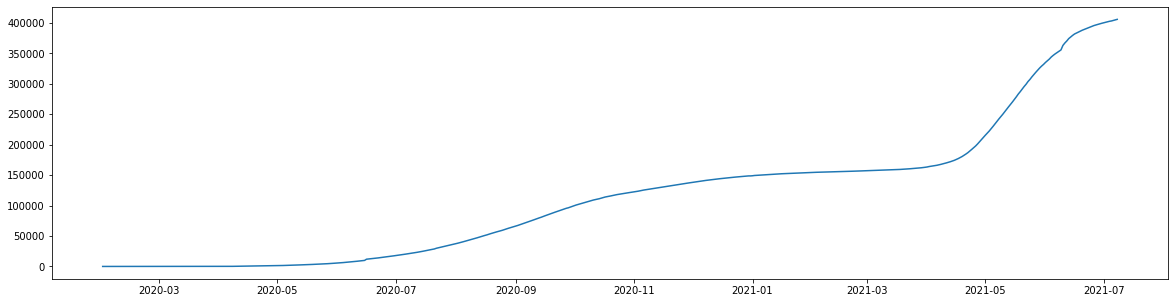

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new['ds'],df_new['y'])
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


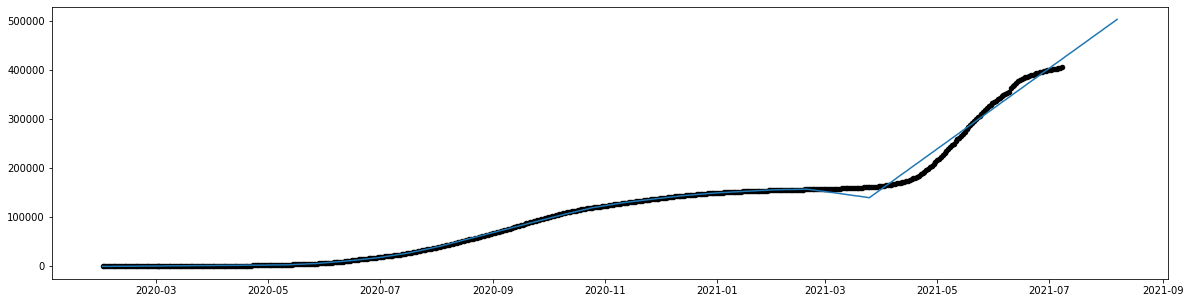

In [ ]:
from fbprophet import Prophet
model=Prophet()
model.fit(df_new)
x = model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(x)
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'],s=20,c='k')
plt.plot(forecast['ds'],forecast['yhat'])

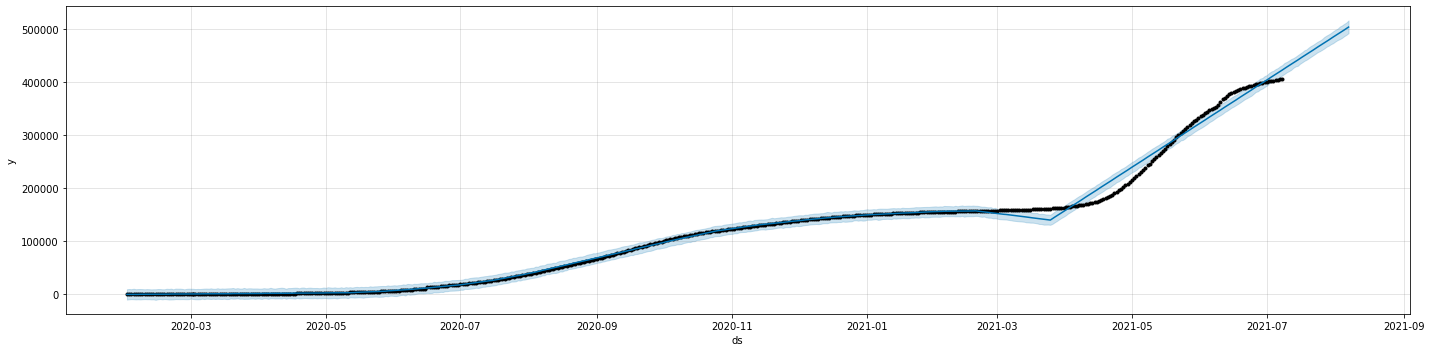

In [ ]:
model.plot(forecast,figsize=(20,5));